# **DEFINING THE QUESTION**

# a)**Problem statement**

Investigating a claim about the blue cars from the autilob dataset.


Ho :Average of blue cars taken = Average of blue car returned

H1 : Average of blue cars taken is not equal to the Average of blue car returned


Therefore




Ho:U ;taken =returned

H1:U ; taken </> returned.

# b)  **Metric for Success**

The objectives for this data includes investigating the claim listed above and knowing whether or not the the average number of blue cars taken is different that of the blue cars returned

# **c) Understanding  context**

we have been tasked to understand electric car usage by solving for another research question.Working as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

# **d) Recording the Experimental Design**

1)Defining the research question

2)Finding and dealing with outliers, anomalies, and missing data within the dataset.

3)Plot appropriate univariate and bivariate summaries recording our observations.

4)Implement the solution by performing hypothesis testing.

5)Challenge your solution by providing insights on how you can make improvements. Defining the research question

# **e) Relevance of the data**

Data used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).Dataset used  ranges from january to july of 2018 and is relevant for this analysis

# **0.0 Data Loading**

# **0.1 Importing required libraries**

In [1]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


In [2]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **0.2 Loading Data**

In [4]:
# read the csv file

url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)


In [5]:
#previewing our df


df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [6]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# **0.3 Checking the data**

In [7]:

#checking for more information our about data set in terms of counts data types etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
#checking column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [9]:
#checking for our data shape
#no.of rows and columns

print(df.shape)

(16085, 13)


In [10]:
#checking for numerical info in each column

df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# **1.0 Data Cleaning**

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [12]:
## no of missing values in columns

df.isna().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [13]:
#dropping the columns that wont be use in this reseach
#dropping columns on utilib because my focus is on blue cars
df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','date'],axis=1, inplace=True)

#
#Cheking if our columns have been dropped
#
#
df.head(3)

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27


In [14]:
#checking for space in between day_type column
print(df['day_type'].str.isspace().sum())


0


In [15]:
#checking for unique values in our dataset
df.nunique()

Postal code              104
n_daily_data_points       23
dayOfWeek                  7
day_type                   2
BlueCars_taken_sum       932
BlueCars_returned_sum    929
Slots_freed_sum          297
Slots_taken_sum          301
dtype: int64

In [16]:
# Checking for unique values in categorical columns
df


print('dayOfWeek')
print(df['dayOfWeek'].unique())

print('day_type ')
print(df['day_type'].unique())



dayOfWeek
[0 1 2 3 4 5 6]
day_type 
['weekday' 'weekend']


In [17]:
#renaming day of week column 
df.rename({'dayOfWeek':'day_of_week'},axis = 1,inplace =True)
df.head()

,Postal code,n_daily_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20


Text(0.5, 1, 'BlueCars_taken_sum')

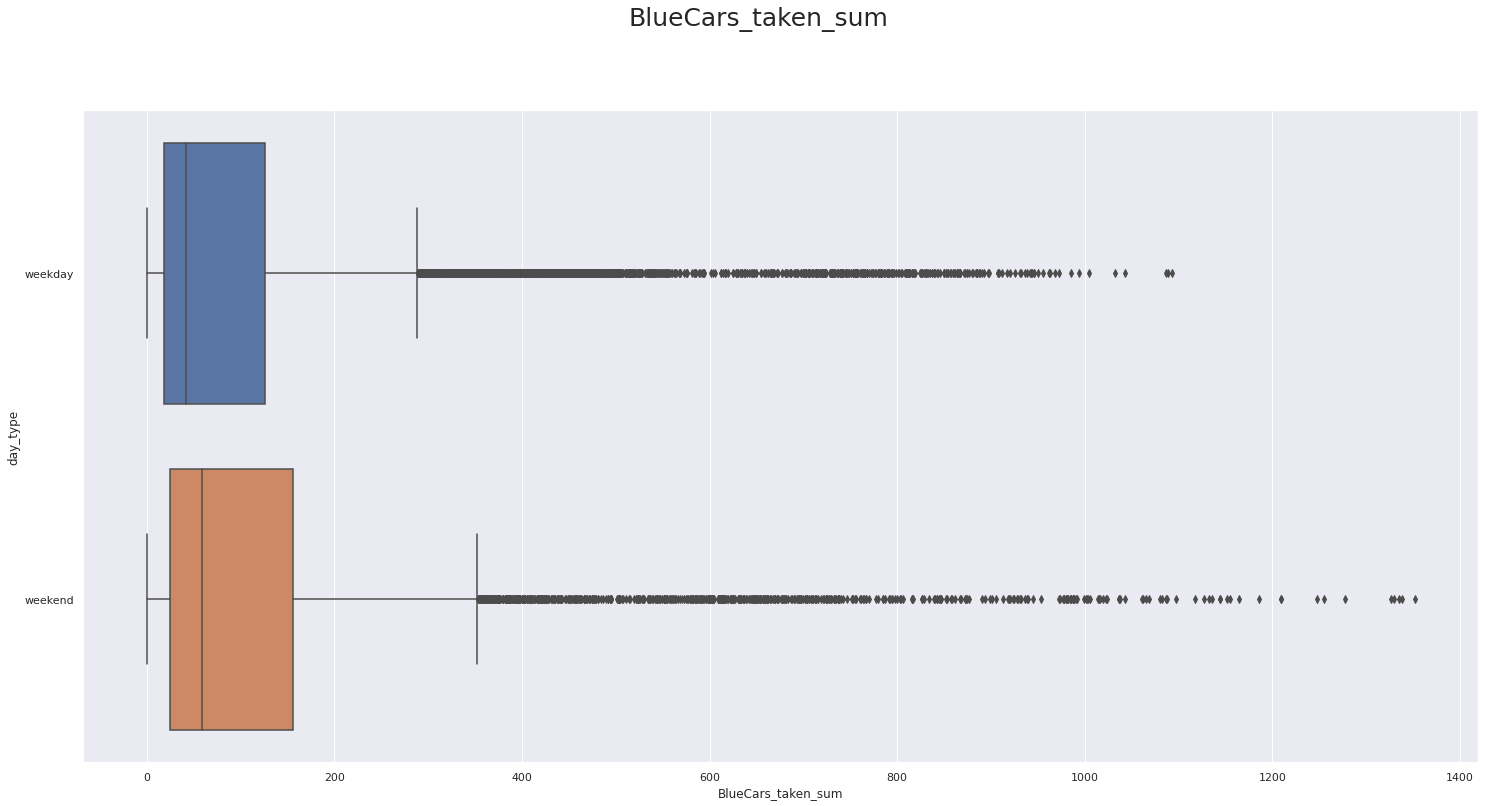

In [18]:
#checking for outliers in variable blue cars taken
sns.boxplot( x= 'BlueCars_taken_sum', y='day_type' , data=df) 
plt.suptitle('BlueCars_taken_sum',fontsize=25, y=1)

Text(0.5, 1, 'BlueCars_returned_sum')

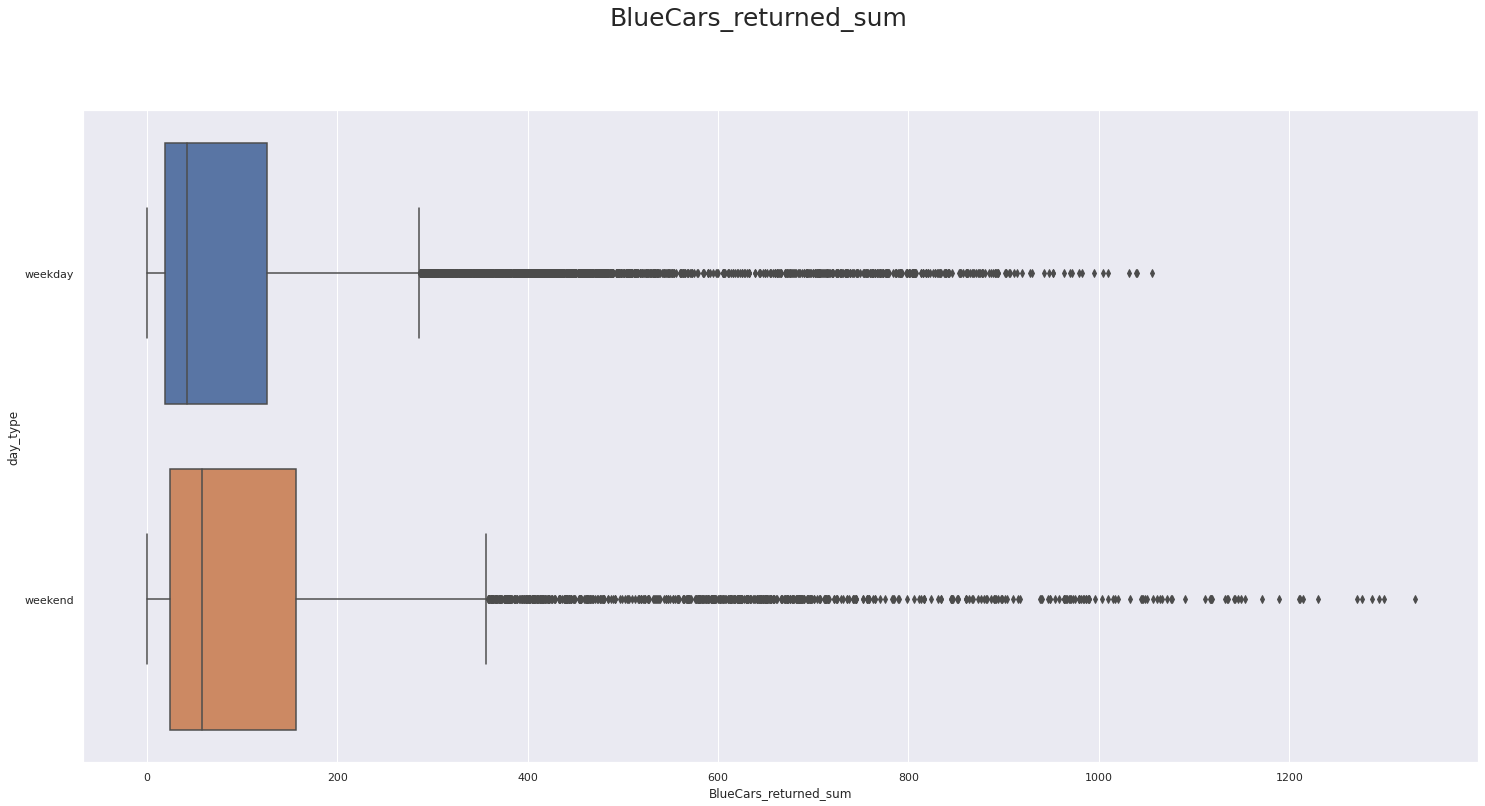

In [19]:
#checking for outliers in variable blue cars returned
sns.boxplot( x= 'BlueCars_returned_sum', y='day_type' , data=df) 
plt.suptitle('BlueCars_returned_sum',fontsize=25, y=1)

In [20]:
#checking and removing for outliers using the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df8 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# previewing our new dataset
# ---
# 
print(df8.shape)

(9936, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [21]:
#previewing a random sample of final dataset
df8_sample = df8.sample(n =10,replace =False)
print(df8_sample)

       Postal code  n_daily_data_points  day_of_week day_type  BlueCars_taken_sum  BlueCars_returned_sum  Slots_freed_sum  Slots_taken_sum
10035        93100                 1440            1  weekday                  95                     93                2                1
6506         92230                 1440            4  weekday                  44                     52                1                0
13942        94150                 1440            5  weekend                  26                     19                4                4
7601         92310                 1440            0  weekday                  46                     44                0                0
7934         92330                 1440            4  weekday                  42                     40                0                0
9670         92700                 1440            1  weekday                  87                     87                0                0
8219         92350         

# **1.1 Univariate Analysis**

In [22]:
# Describe numerical variables
df8[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,9936.000000,9936.000000
mean,51.498692,51.466284
std,50.096392,49.989072
min,0.000000,0.000000
25%,17.000000,17.000000
50%,35.000000,34.000000
75%,69.000000,69.000000
max,302.000000,306.000000


From the instructions,we are to investigate blue cars on either weekdays or weekends.Therefore i will use weekend,denoted by 5 and 6

In [23]:
df4 = df8[df8.day_type == 'weekend']
df4.head(4)

,Postal code,n_daily_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
3905,91330,1440,6,weekend,28,17,4,2
3911,91330,1440,5,weekend,24,21,2,2
3912,91330,1440,6,weekend,27,30,0,0
3918,91330,1439,5,weekend,16,10,1,1


In [24]:
#proportion of day_of_week
df4['day_of_week'].value_counts(normalize=True)*100
#proportion we look for percentage thats why *100

6    52.815278
5    47.184722
Name: day_of_week, dtype: float64

From the dataset, the days of the week are coded with 5 is saturday and 6 is sunday

Therefore sunday has a slightly higher percentage as compared to saturday

***Bluecars returned***

In [25]:
#mode
df4["BlueCars_returned_sum"].mode()

0    17
dtype: int64

In [26]:
#Measures of dispersion
# investigating kurtosis
kurt = df4['BlueCars_returned_sum'].kurt()
print(kurt)
#investigating std
std = df4['BlueCars_returned_sum'].std()
print(std)
#investigating skewness
skew = df4['BlueCars_returned_sum'].skew()
print(skew)

2.5664312755938816
54.494413167809206
1.5591101660830784


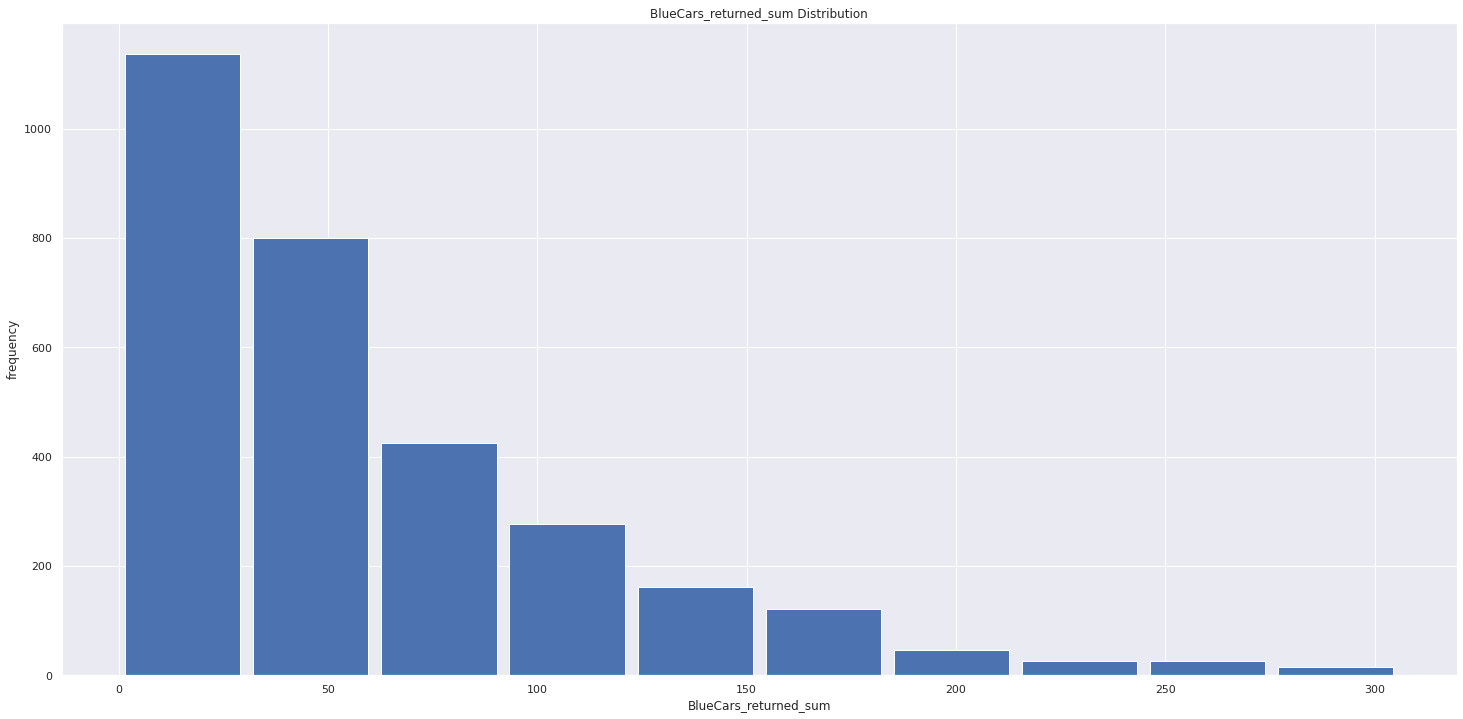

In [27]:
# returned blue cars distribution 
plt.hist('BlueCars_returned_sum', bins=10, histtype='bar',rwidth=0.9,data=df4)

plt.xlabel('BlueCars_returned_sum')
plt.ylabel('frequency')
plt.title('BlueCars_returned_sum Distribution') 
plt.show()

## ***Bluecars taken***

In [28]:
#mode
df4["BlueCars_taken_sum"].mode()

0    18
1    20
dtype: int64

In [29]:
#Measures of dispersion
# investigating kurtosis
kurt1 = df4['BlueCars_taken_sum'].kurt()
print(kurt)
#investigating std
std1 = df4['BlueCars_taken_sum'].std()
print(std)
#investigating skewness
skew1 = df4['BlueCars_taken_sum'].skew()
print(skew)

2.5664312755938816
54.494413167809206
1.5591101660830784


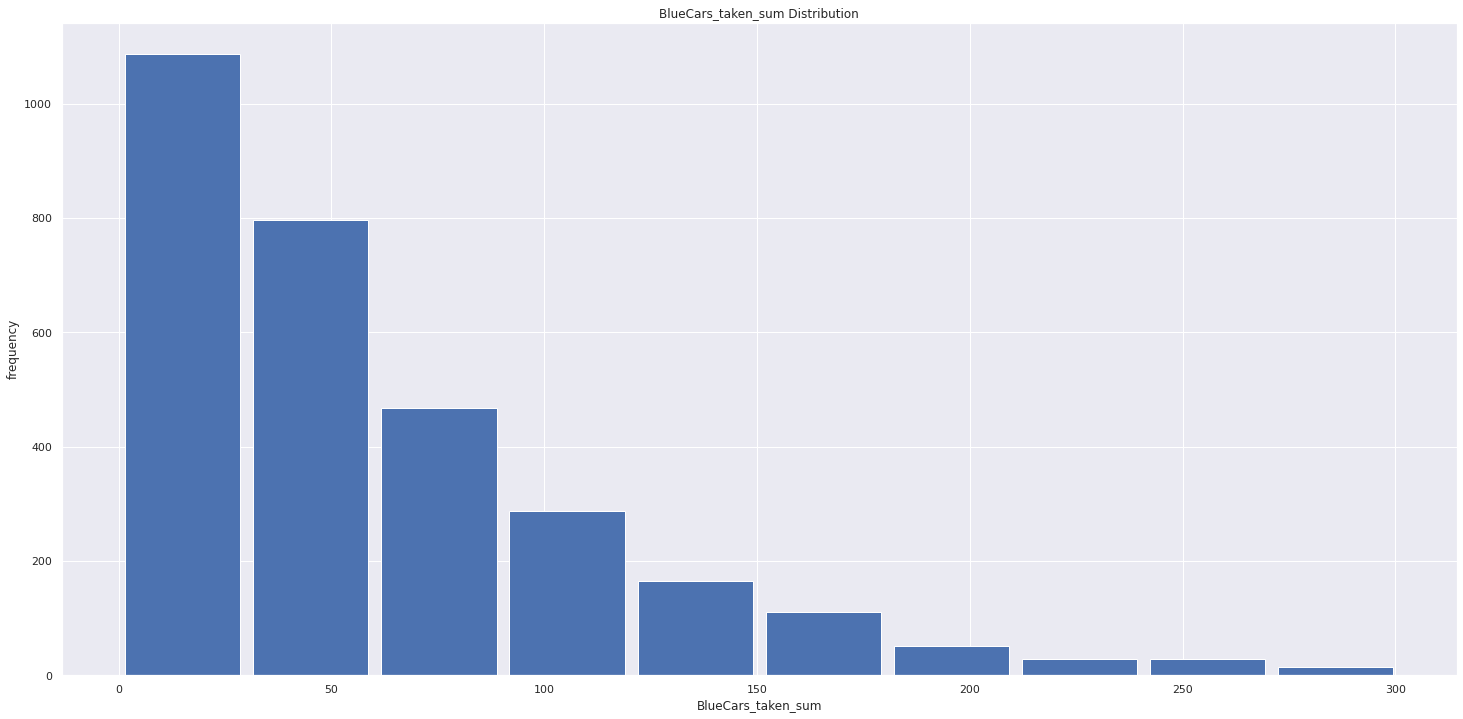

In [30]:
# taken blue cars distribution 
plt.hist('BlueCars_taken_sum', bins=10, histtype='bar',rwidth=0.9,data=df4)

plt.xlabel('BlueCars_taken_sum')
plt.ylabel('frequency')
plt.title('BlueCars_taken_sum Distribution') 
plt.show()

# **1.2 Bivariate Analysis**

<Figure size 864x720 with 0 Axes>

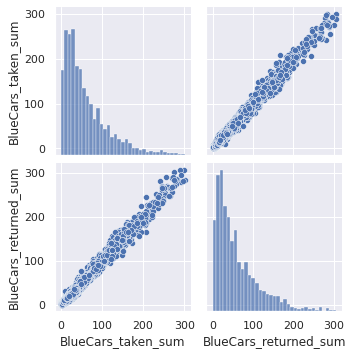

<Figure size 864x720 with 0 Axes>

In [31]:
# correlation between numeric variables
#
#
sns.pairplot(df4[['BlueCars_taken_sum','BlueCars_returned_sum']])
#
plt.figure(figsize=(12,10))
#


In [32]:
df4['BlueCars_taken_sum'].corr(df4['BlueCars_returned_sum'])

0.9916907787115723

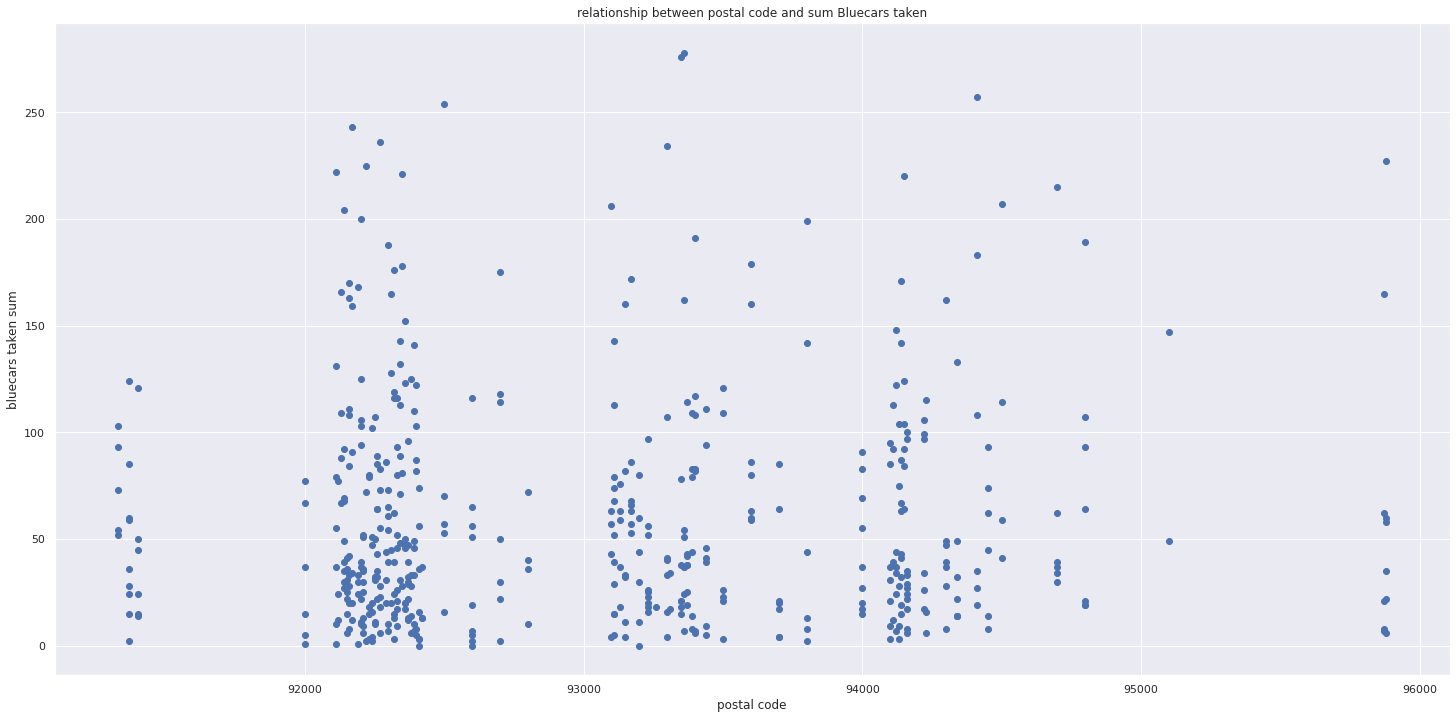

In [44]:
#plotted using a sample to avoid over laps
plt.scatter(df4['Postal code'].sample(500),df4['BlueCars_taken_sum'].sample(500))
#tile
plt.title('relationship between postal code and sum Bluecars taken')
plt.xlabel('postal code')
plt.ylabel('bluecars taken sum')
plt.show()

***observations***

The Locations around postal address 92000 have quite fond reception of the blue car sharing services and use most frequently and those around postal address 93000-94000 are also quite receptive to these services

# **2.0 Hypothesis Testing**

Our hypothesis is to determine whether the average of blucars taken is same as blue cars returned or not.

Ho:U:taken=returned

H1:U;taken =! returned


We will define our alpha = 0.05 which is a 5% Significance level

***2.1 Sampling***

In [35]:
# Using the random sampling to select the sample population to work with where we selected 100 values to represent our dataon blue cars taken on weekends
df_taken = df4['BlueCars_taken_sum'].sample(n = 100, replace="False")
print(df_taken)



14248     46
14627     95
5158     111
4400     171
12780     44
12437     52
8126      30
10540     18
4363       9
12756     59
13297     38
15502    113
7810      38
13248      8
5603      42
15785     13
8827      10
5890      85
8429      31
14084    101
14390     57
10926     28
7356     161
11286     14
13853     71
14124    108
12518     27
13603     63
9201      19
16043     15
6263      66
6650      69
8778      13
7749      77
15405     40
9401     166
5218      91
15561     87
10651     61
8792      25
14328     48
13603     63
12049    131
13423     39
10171     57
15682     22
14286     50
13989     21
5692      89
10652     47
10627     63
10658     59
11830      4
10082    165
4425     142
8665      27
12943     37
7474     227
4031      29
6920      22
15058     16
4082      23
11030     39
10881     32
13861     67
4000      33
14695     44
9696     116
4480     172
9614     179
5185      95
13276     10
10504      4
7624      82
6271      69
13949     14
10149     51

In [39]:
# Using the random sampling to select the sample population to work with where we selected 100 values to represent our dataon blue cars returned on weekends
df_returned = df4['BlueCars_returned_sum'].sample(n = 100, replace="False")
print(df_returned)

4311       9
14002     21
8949     117
15970     20
12727     50
13305     50
9200      16
13704     58
4736      28
9208       7
12437     58
12526     28
13663     44
11629     25
13656     50
9288      17
11849      5
10798     33
7461     202
7124      32
13794     93
7551      66
10292     25
15458     63
9014     139
14293     56
6955      42
6695     123
5863      82
7794      78
16068     33
14748     48
13758     85
7585      65
6472      66
9443     158
13853     68
5646      97
8400       3
9688     154
5348     150
7623      87
6858      84
5951      74
8762      13
5998      31
13238     10
14131     82
10759     33
5327     167
13704     58
9362     175
10827     19
13262      9
13513     53
6812      73
12212      2
4297       9
11885      6
9072      33
10989     33
7586      79
14376     50
10326     29
6635      96
5596      37
10074    156
11971      4
5990      62
6257      72
15711     35
4326      18
9140      11
6827      52
7111      31
13861     69
16068     33

In [36]:
#dropping the daytype column because we have established we are working withweekends
df4.drop(['day_type'],axis =1, inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
## NORMALITY TESTS
##  establishing datsa is normally distributed using Gaussian Distribution method
# imporing the shapiro function
from scipy.stats import shapiro 
# testing for normality
stat, p = shapiro(df_taken)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample is normally distributed')
else:
	print('Sample is not normally distributed')
  

Statistics=0.865, p=0.000
Sample is not normally distributed


In [41]:
#calculating the mean of our two sample groups
x=np.mean(df_taken)
y=np.mean(df_returned)
print(x,y)

60.73 63.7


In [45]:
#our data is not normally distributed thus applying the wilcoxon signed rank test because is a non- parametric procedure
from scipy.stats import wilcoxon
# comparing the  sample groups
stat, p = wilcoxon(df_taken, df_returned)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('fail to reject the Null Hypothesis (H0)')
else:
    print('reject Null Hypothesis (H0)')

Statistics=2272.500, p=0.385
fail to reject the Null Hypothesis (H0)


**Conclusion**

There is not enough evidence to reject the null hypothesis  therefore we conclude that we fail to reject Ho and it is infact True 